### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimization
import pandas_datareader.data as web
import datetime

### Fetching the Data

In [2]:

stocks = ['INFY.NS', 'TCS.NS', 'TATAMOTORS.NS', 'MARUTI.NS', 'SUNPHARMA.NS', 'CIPLA.NS', 'ITC.NS', 'MARICO.NS', 'GOLDBEES.NS']
start_date = datetime.datetime(2021, 4, 1)
end_date = datetime.datetime(2023, 3, 1)

# Create an empty DataFrame to store the data
portfolio_df = pd.DataFrame()

# Fetch and store data for each stock in the portfolio DataFrame
for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data = ticker.history(period="1d", start=start_date, end=end_date)
    if not stock_data.empty:
        portfolio_df[stock] = stock_data['Close']



In [18]:
portfolio_df.to_csv("portfolios.csv",index=True)
portfolio = pd.read_csv("portfolios.csv",parse_dates=True,index_col="Date")
portfolio

,INFY.NS,TCS.NS,TATAMOTORS.NS,MARUTI.NS,SUNPHARMA.NS,CIPLA.NS,ITC.NS,MARICO.NS,GOLDBEES.NS
Date,,,,,,,,,
2021-04-01 00:00:00+05:30,1294.557739,3002.441406,306.793823,6771.311035,595.801819,796.767761,200.057144,396.416504,39.099998
2021-04-05 00:00:00+05:30,1317.641357,3072.545898,304.102203,6619.384277,593.899536,798.179565,193.238556,391.744202,39.330002
2021-04-06 00:00:00+05:30,1318.716187,3097.020508,306.793823,6602.514160,605.264404,814.148071,193.329483,392.279572,39.490002
2021-04-07 00:00:00+05:30,1336.612915,3103.376465,306.843658,6713.708984,605.849731,818.724243,194.375000,397.146576,40.110001
2021-04-08 00:00:00+05:30,1345.631592,3146.966553,312.974579,6676.399902,599.216125,819.844055,193.874954,403.619659,40.279999
...,...,...,...,...,...,...,...,...,...
2023-02-22 00:00:00+05:30,1520.629028,3367.681641,428.115692,8578.224609,965.136475,946.970886,381.499542,499.224823,48.160000
2023-02-23 00:00:00+05:30,1509.821533,3379.809814,431.854065,8615.176758,969.072571,944.757263,385.226593,496.499542,47.860001
2023-02-24 00:00:00+05:30,1509.772949,3366.592773,426.420990,8579.759766,967.079590,946.233032,382.741913,494.319275,47.779999


### Plotting the data

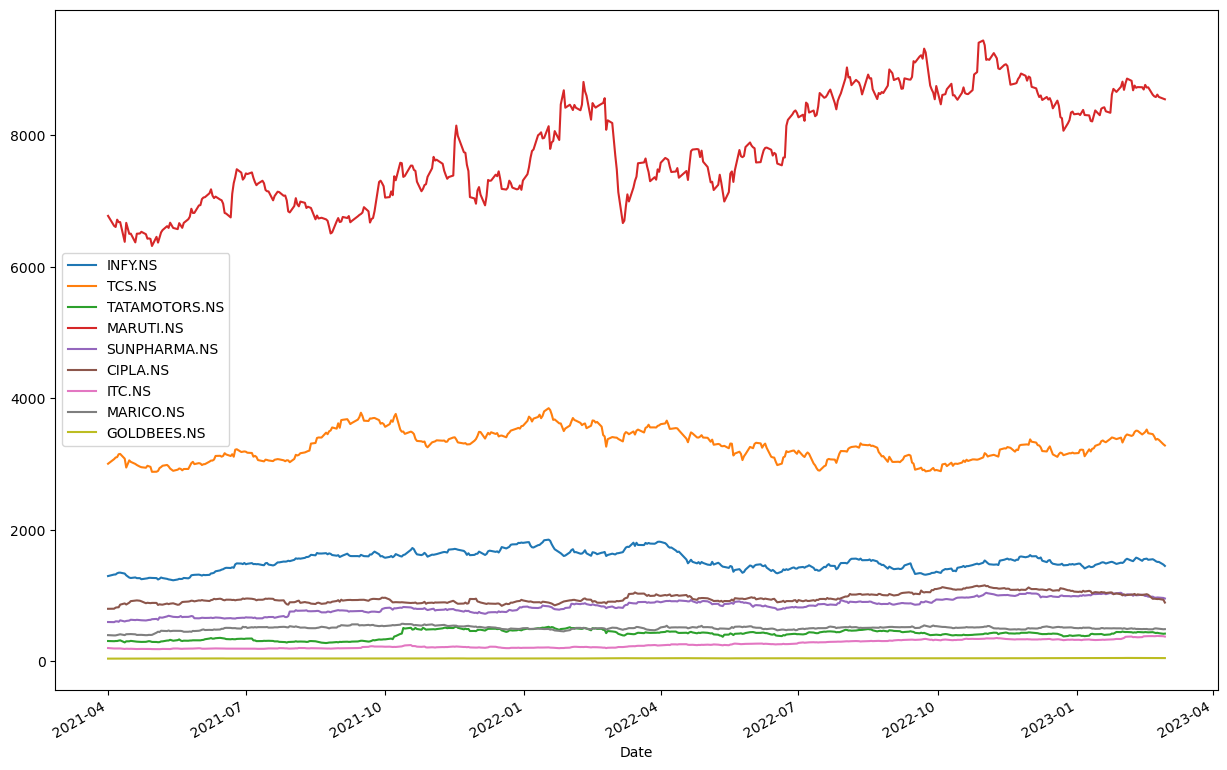

In [4]:
portfolio.plot(figsize=(15,10));

### Calculating Returns

In [5]:
from pypfopt import expected_returns
mu = expected_returns.capm_return(portfolio)
mu

INFY.NS          0.192771
TCS.NS           0.171896
TATAMOTORS.NS    0.353856
MARUTI.NS        0.185053
SUNPHARMA.NS     0.181987
CIPLA.NS         0.134744
ITC.NS           0.165302
MARICO.NS        0.163198
GOLDBEES.NS      0.022316
Name: mkt, dtype: float64

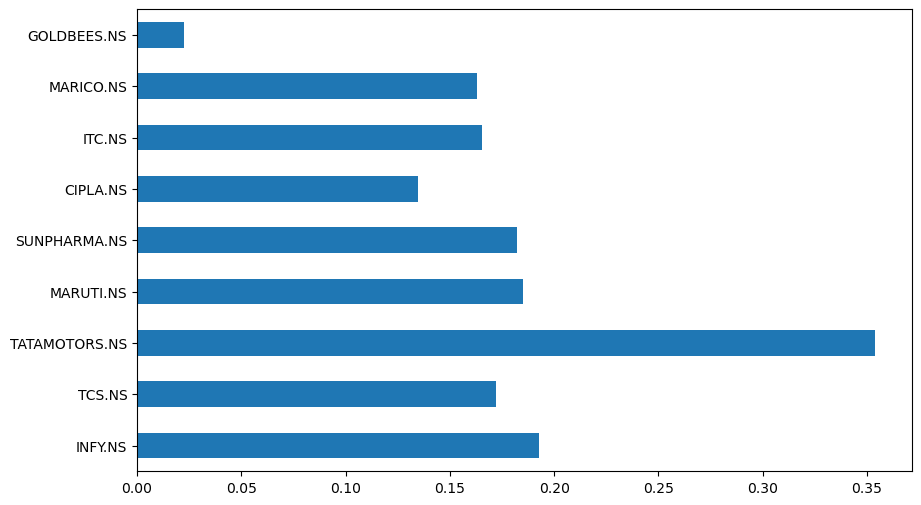

In [6]:
mu.plot.barh(figsize=(10,6));

### Variance-Covariance

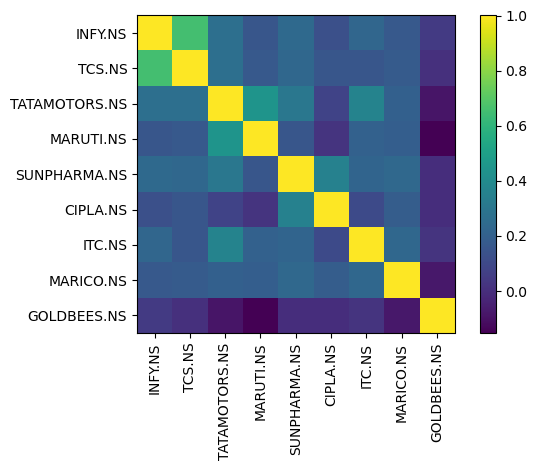

In [7]:
from pypfopt import risk_models
from pypfopt import plotting
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
plotting.plot_covariance(S,plot_correlation=True);

### Optimizing the weights

In [8]:
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))


{'INFY.NS': 0.11671, 'TCS.NS': 0.11242, 'TATAMOTORS.NS': 0.11825, 'MARUTI.NS': 0.11096, 'SUNPHARMA.NS': 0.11467, 'CIPLA.NS': 0.11248, 'ITC.NS': 0.11301, 'MARICO.NS': 0.11294, 'GOLDBEES.NS': 0.08856}


### Portfolio Performance

In [9]:
ef.portfolio_performance(verbose=True)

Expected annual return: 17.9%
Annual volatility: 13.5%
Sharpe Ratio: 1.18


(0.1793117325306066, 0.13468287568330262, 1.182865540421167)

### CAPM 

In [21]:
# Define the Nifty 50 symbol

nifty_50_symbol = '^NSEI'
# Fetch data for the Nifty 50
nifty_50_data = yf.download(nifty_50_symbol, start=start_date, end=end_date)['Close']
nifty_50_returns = nifty_50_data.pct_change().dropna()
# Create an empty DataFrame to store beta values
beta_df = pd.DataFrame(columns=['Stock', 'Beta'])

# Calculate beta for each stock
for stock_symbol in portfolio.columns:
    stock_returns = portfolio[stock_symbol].pct_change().dropna()  
    # Calculate the covariance between stock returns and Nifty 50 returns
    covariance = np.cov(stock_returns, nifty_50_returns)[0, 1]

    # Calculate the variance of Nifty 50 returns
    market_variance = np.var(nifty_50_returns)

    # Calculate the beta
    beta = covariance / market_variance
    # Create a DataFrame with the current stock's beta
    stock_beta_df = pd.DataFrame({'Stock': [stock_symbol], 'Beta': [beta]})
    # Concatenate the current stock's beta DataFrame with beta_df
    beta_df = pd.concat([beta_df, stock_beta_df], ignore_index=True)


# Print the beta values for each stock
print(beta_df)









    


[*********************100%%**********************]  1 of 1 completed
           Stock      Beta
0        INFY.NS  0.965289
1         TCS.NS  0.817322
2  TATAMOTORS.NS  1.546617
3      MARUTI.NS  0.852477
4   SUNPHARMA.NS  0.622755
5       CIPLA.NS  0.249308
6         ITC.NS  0.711624
7      MARICO.NS  0.547318
8    GOLDBEES.NS -0.059038


### Portfolio Beta

In [23]:
# Calculate the portfolio beta
portfolio_beta = sum(cleaned_weights[symbol] * beta_df[beta_df['Stock'] == symbol]['Beta'].values[0] for symbol in cleaned_weights)

print("Portfolio Beta:", portfolio_beta)
portfolio_beta

Portfolio Beta: 0.7184801769531748


0.7184801769531748

### CAPM Equation

In [25]:
# Calculate the average daily return of the Nifty 50 index
average_market_return = nifty_50_returns.mean()
risk_free_rate = 0.07  # 7%
portfolio_beta = portfolio_beta  
expected_market_rate = average_market_return
# Calculate the market risk premium
market_risk_premium = expected_market_rate - risk_free_rate
# Calculate the expected return using CAPM and convert to percentage
expected_return_percentage = (risk_free_rate + portfolio_beta * (average_market_return - risk_free_rate)) * 100

print("Expected Return using CAPM (%):", expected_return_percentage, "%")

Expected Return using CAPM (%): 1.99696938125365 %
